In [143]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [144]:
np.random.seed(2222)

In [145]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [146]:
print(X_train.shape, X_test.shape)
print(X_train.shape[0])

(60000, 28, 28) (10000, 28, 28)
60000


In [147]:
assert(X_train.shape[0] == y_train.shape[0]), 'The number of images is not equal to the number of labels.'
assert(X_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to the number of labels.'
assert(X_train.shape[1:] == (28, 28)), 'The dimensions of the images are not 28x28'
assert(X_test.shape[1:] == (28, 28)), 'The dimensions of the images are not 28x28'

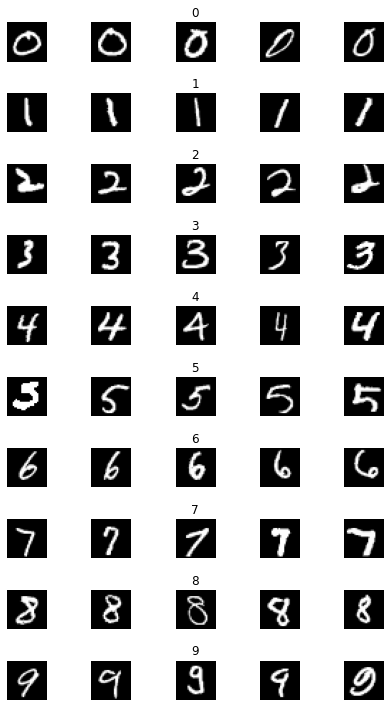

In [148]:
n_samples = []
cols=5
n_classes=10
fig, ax = plt.subplots(nrows=n_classes, ncols=cols, figsize=(6, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(n_classes):
        x_selected = X_train[y_train==j]
        ax[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap('gray'))
        ax[j][i].axis('off')
        if i == int(cols/2):
            ax[j][i].set_title(str(j))
            n_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


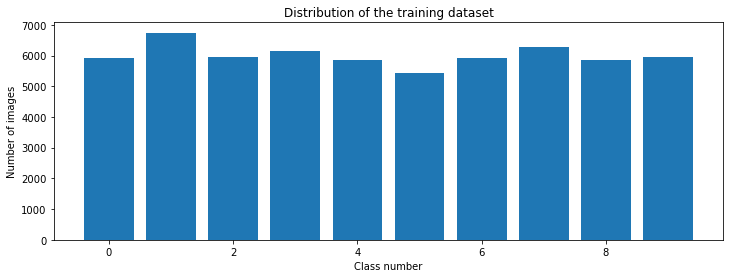

In [149]:
print(n_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), n_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')
plt.show()

In [171]:
np.std(n_samples)

322.082908581005

In [151]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [152]:
y_train.shape

(60000, 10)

In [153]:
X_train = X_train/255
X_test = X_test/255

In [154]:
n_pixels= 28*28


In [155]:
n_pixels
X_train = X_train.reshape(X_train.shape[0], n_pixels)
X_test = X_test.reshape(X_test.shape[0], n_pixels)

In [156]:
X_train.shape

(60000, 784)

In [157]:
def create_model():
    model=Sequential()
    model.add(Dense(10, input_dim=n_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01),  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [158]:
model = create_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________
None


In [159]:
h = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=True)

Epoch 1/10
270/270 [==============================] - 3s 7ms/step - loss: 0.6803 - accuracy: 0.7774 - val_loss: 0.3359 - val_accuracy: 0.9020
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.3448 - accuracy: 0.8980 - val_loss: 0.2525 - val_accuracy: 0.9265
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2981 - accuracy: 0.9099 - val_loss: 0.2609 - val_accuracy: 0.9230
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2728 - accuracy: 0.9174 - val_loss: 0.2357 - val_accuracy: 0.9317
Epoch 5/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2565 - accuracy: 0.9234 - val_loss: 0.2317 - val_accuracy: 0.9320
Epoch 6/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2538 - accuracy: 0.9245 - val_loss: 0.2303 - val_accuracy: 0.9355
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2394 - accuracy: 0.9282 - val_loss: 0.2199 - val_accuracy: 0.9362
Epoch 

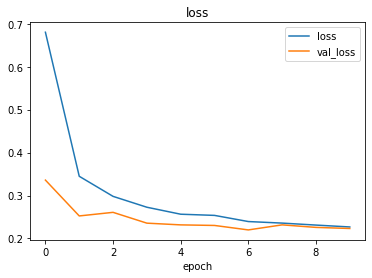

In [160]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.show()

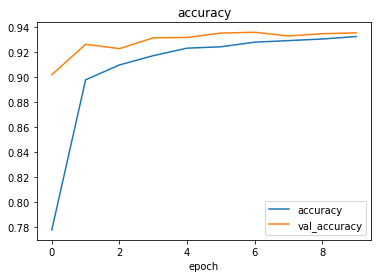

In [161]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

In [162]:
score = model.evaluate(X_test, y_test, verbose=0)

In [163]:
print('test score', score[0])
print('accuracy', score[1])

test score 0.25286582112312317
accuracy 0.9253000020980835


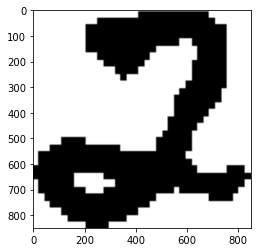

In [164]:
import requests
from PIL import Image
url = 'https://i.im.ge/2022/09/05/O8hkic.Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

In [165]:
import cv2
def prepare(img):
    img_array = np.asanyarray(img)
    resized = cv2.resize(img_array, (28, 28))
    gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    final = cv2.bitwise_not(gray_scale)
    return final

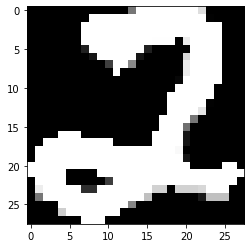

In [166]:
gray_img = prepare(img)
plt.imshow(gray_img, cmap=plt.get_cmap('gray'))

In [167]:
print(gray_img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 118 255 255 255 255
  255 255 255 255 222   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   2   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 254 254
  254   0 236 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0  33 255 255 255 255 255 255 255  33   0   0
    0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0  21 255 255 255 255 255  21   0   0   0
    0   0 215 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 255 255 137   0   0   0   0
    0   0 235 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   

In [168]:
gray_img = gray_img/255
gray_img =gray_img.reshape(1, 28*28)
print(gray_img)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.4627451  1.         1.         1.         1.
  1.         1.         1.         1.         0.87058824 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.00784314 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         1.         1.         1.         1.
  1.         1.         1.         1.   

In [169]:
prediction = model.predict(gray_img, verbose=0)
classes_x=np.argmax(prediction,axis=1)
print('predicted digit', str(classes_x))

predicted digit [2]
